## <center>Applied Data Science - Hands-on Machine Learning with Python - S2023</center>
# <center>Week 4: Classification <center>
### <center>2/9/2023</center>

# Today

- One Vs. Rest For Multiclass/Multilabel Classification
- Distance Based: kNN
- Tree Based: Decision Tree


<br>
<br>

# <center>Questions?</center>
<br>
<br>

# Wine as Multi-Class Classification

In [3]:
df_wine = pd.read_csv('../data/wine_dataset.csv',usecols=['alcohol','ash','proline','hue','class'])

X = df_wine[['proline','hue']]
y_c = df_wine['class']

zscore = lambda x: (x-x.mean()) / x.std()

X_zscore = X.apply(zscore,axis=0)
alcohol_zscore = zscore(df_wine.alcohol)

y_c.value_counts().sort_index()

0    59
1    71
2    48
Name: class, dtype: int64

# One Vs. Rest (OvR) Classification For Multiclass, Multilabel

- Can use any binary classifier for Multiclass/Multilabel classification by training multiple models:

 - model 1 : class 1 vs (class 2 and class 3)
 - model 2 : class 2 vs (class 1 and class 3)
 - model 3 : class 3 vs (class 1 and class 2)
<br>
<br>

- For Multiclass
 - Predict $\hat{y}$ using the model with highest $P(y=\hat{y}\mid x)$, or distance from boundary, or ...
<br>
<br>

- For Multilabel
 - Predict $\hat{y}$ for any model that predicts a value above some threshold
<br>
<br>
 
See [sklearn](https://scikit-learn.org/stable/modules/multiclass.html) for more info and other methods

# OvR For Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(multi_class='ovr', # default
                          max_iter=1000)     # to avoid timeout errors
logr.fit(X_zscore,y_c)
y_hats = logr.predict(X_zscore.iloc[[15,82,166]]) # generate 3 predictions
y_prob = logr.predict_proba(X_zscore.iloc[[15,82,166]])

for y_hat,p in zip(y_hats,y_prob):
    print(y_hat,p.round(3))

0 [0.967 0.031 0.001]
1 [0.146 0.853 0.001]
2 [0.176 0.344 0.48 ]


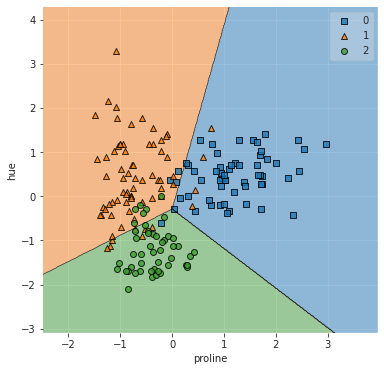

In [5]:
my_plot_decision_regions(X_zscore,y_c,logr,figsize=(6,6))

# Distance Based: k-Nearest Neighbor (kNN)
<br>
- What category do most of the $k$ nearest neighbors belong to?
<br>
<br>
<br>
<div align="center"><img src="images/knn_classifier.png" width="600px"></div>

From PML

# KNN in sklearn

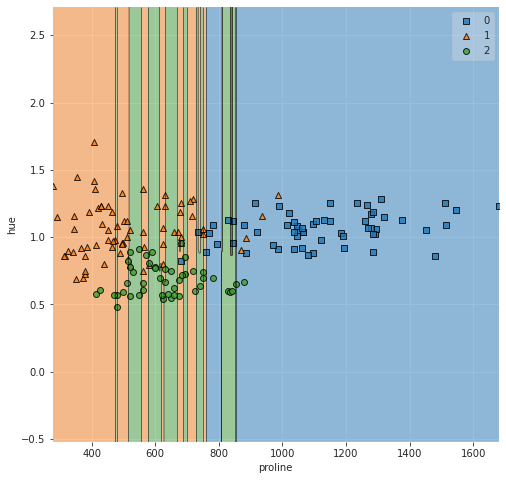

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y_c)

my_plot_decision_regions(X,y_c,knn)

# Effects of Standardization on Distance Based Methods

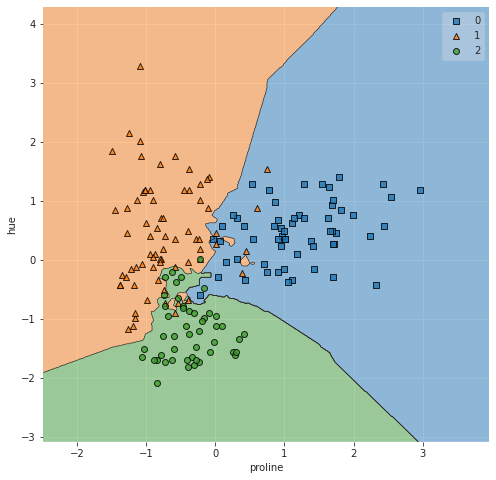

In [7]:
knn_z = KNeighborsClassifier(n_neighbors=3)
knn_z.fit(X_zscore,y_c)

my_plot_decision_regions(X_zscore,y_c,knn_z)

# Curse of Dimensionality

The more dimensions, the less likely points are "close" to each other.

In [8]:
# From Data Science From Scratch by Joel Grus

def random_distances(dim,num_pairs=10_000):
    return np.sqrt(np.square(np.random.rand(num_pairs,dim) - np.random.rand(num_pairs,dim)).sum(axis=1))

# calculate average and minimum distance for 1 to 100 dimensions
dimensions = range(1,100)
avg_distances = []
min_distances = []
min_avg_ratio = []
np.random.seed(0)
for d in dimensions:
    distances = random_distances(d)
    avg_distances.append(distances.mean())
    min_distances.append(distances.min())
    min_avg_ratio.append(distances.min() / distances.mean())

# Curse of Dimensionality Cont.


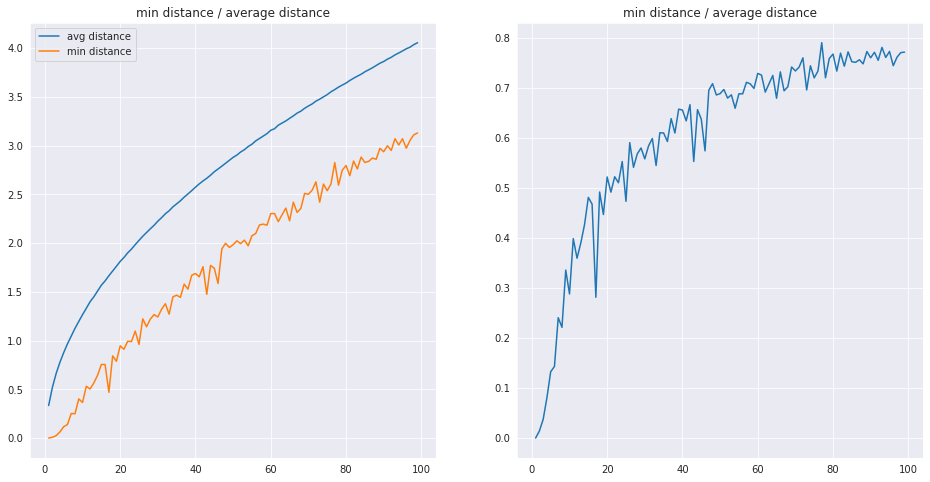

In [9]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(dimensions,avg_distances,label='avg distance');
ax[0].plot(dimensions,min_distances,label='min distance');
ax[0].legend()
ax[0].set_title('min distance / average distance');
ax[1].plot(dimensions,min_avg_ratio)
ax[1].set_title('min distance / average distance');

# Regression with kNN

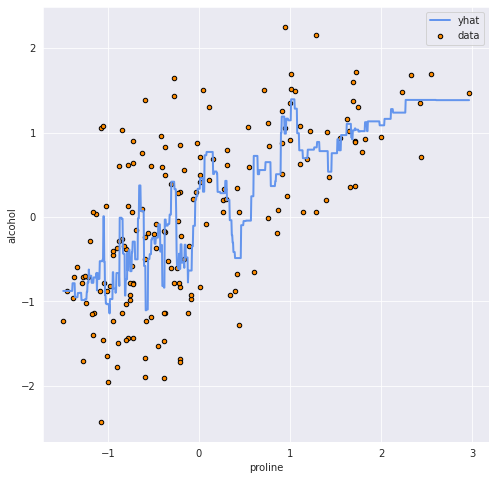

In [10]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_zscore[['proline']],alcohol_zscore)

my_plot_regression(X_zscore[['proline']],alcohol_zscore,knnr)

In [11]:
print(X_zscore.iloc[:5].proline)
knnr.predict(X_zscore.iloc[:5].proline.values.reshape(-1,1))

0    1.010159
1    0.962526
2    1.391224
3    2.328007
4   -0.037767
Name: proline, dtype: float64


array([1.39362532, 1.16451234, 0.78019379, 1.38623458, 0.20864312])

<br>
<br>

# <center>Questions?</center>
<br>
<br>